In [1]:
import pandas as pd
import os
os.chdir('../utils')

from common_utils import *
from rsa import *

#### Rabin-Miller Test

In [6]:
primes = pd.read_csv('primes.csv', header=None, names=['prime'])
prime_list = primes['prime'].tolist()
# get 1000 random primes
sample_primes = primes.sample(10000)

In [7]:
# iterate over the sample primes
for index, row in sample_primes.iterrows():
    prime_test = int(row['prime'])
    if not miller_rabin(prime_test, 15):
        print('Failed on prime: ', prime_test)
        break
print('All primes passed the test')

All primes passed the test


In [9]:
composites = []

# generate 1000 composites
i = 18
while len(composites) < 1000:
    if i in prime_list:
        i += 1
        continue
    composites.append(i)
    i += 1

In [10]:
for i in composites:
    if miller_rabin(i, 15)[0]:
        print('Failed on composite: ', i)
        break
print('All composites passed the test')

All composites passed the test


#### Prime Generator Test

In [12]:
p = gen_prime(1024, 15) # 1024 is bits
print(p)

223851631610285018348631623282153293951091480257184522407417167991195422045811935202639683488923215254060857549414833049496911974528844683322824582205772133557387796650968198635360967604344225694960679721903396661165852725257374649542632356920940048255128981156849115443039058705159141409430418619394572205191


In [19]:
p = gen_prime_range(24, 32, 15) # 24 and 32 are not bits, but the range of numbers
print(p)

29


#### Vulnerable Key Generator Test

In [11]:
e, n, d, phi, p, q = gen_vulnerable_keys(nbits=1024, s=15)

In [12]:
print(n)
print(e)
print(d)    

731461097178306812144266922184339668058148325695542347184826567770946315844347912841299867808981800226096481096436993281030979746694253796076268432140266422812259932111974425360731045280990762036651318436381823678068395976909639079928401285761102455181284219236104827486380057882848642700540733098913695223957
158028985100711953797090038671899563412958968272587144741566524715581640717690124901903250963359420136923830603405290395923782425611172661973383976899034372416453625327031070155949777205749547283230858132813932699307175962373348215095219221012017783292816949285927972454260896288531028189103962767184415368451
55386319608426749298019273018709822078461655891082457657682095995876951601951


In [13]:
# check ed = 1 mod phi
print((e*d) % phi)

1


#### RSA Test

In [2]:
e, n, d, _, _, _ = gen_vulnerable_keys(nbits=1024, s=15)
message = "Hello, world!"
encrypted_message = encrypt(message, n, e)
print(encrypted_message)

802722296614850996065725611524284816011085861942565649148742706175851456744261800827071799522961538379215936866042910964177228821222894857118971691969871627807227891770247422674686948531106764520355066084494291762266717213811484452223777829848135697294887015207018323690990850712428638171204982749392607549580 165569368995061666390758569114821343148404661029120416527476628692966737379177652817657493374112969804615998825009763105565257877579147677530616193601325764233185060338457210458599504612045829376420369203592980312193784170893026689215829076309578924208500714569293090325018565487141943471720014350229214698879 553592666363033951933065632560002716769237497962164988908052773534024561337524667699259127190625062611927714231475332310749623661304427708347403539363128862858955368913274776848374288844140128969810747269347360866456015446988043230843442381590848519147951302869113217490441732117964057557757908034177922226397 3612543465718529500646431552346089199241250910873541234001763785202279

In [3]:
decrypted_message = decrypt(encrypted_message, n, d)
print(decrypted_message)

Hello, world !


#### Wiener Attack Test

In [2]:
e, n, d, _, _, _ = gen_vulnerable_keys(nbits=1024, s=15)
message = "Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries."
encrypted_message = encrypt(message, n, e)
print(encrypted_message)

383887326867422680852852587579564275164186030336514280127203218699248085821748819122963597676343835263931411201543845496173586886621771918914500935774077485088102380263116719307701796940021417279117148259577845227292163845799767347715359238365150725007124833846705719025433588972142603257877615036558977225324 124552166961758814809296540475622820626892825356422385832486580192905729790669102090323648577142662399995123930809739788770506644936814214758007857988810061124481337757511668969873720933641377819025284158126657052660465842599903616039987404253712284112954571654900331601278517063021136315957958798700387125012 456638985631317457001079247815199839011980462673544413058759952054189309460128936023224214824001510684512586822833092073534234800920193931875446158566888604737898536686228579712584569254829700312349782449329329863365914185028728463096556768700946008822156872846308479967436156759511009045512254460621464068493 2812431262517069228987965294153952499466768186890482195063668374193603

In [3]:
potential_private_keys = wiener_atk(e, n, d)[0] # d is here just to check if the attack worked
len(potential_private_keys)

Decrypted, attack worked!


394

In [4]:
wiener_atk_d = check_private_key(potential_private_keys, e, n)

In [5]:
print(decrypt(encrypted_message, n, wiener_atk_d))

Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries.


#### More precise bound

In [6]:
e, n, d, _, _, _ = gen_vulnerable_keys_v2(nbits=1024, s=15)
message = "Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries."
encrypted_message = encrypt(message, n, e)
print(encrypted_message)

268504253427310870071372595420776420941909645063014680643788703211962043603091221613564253877617637243969220576814270214367127136318907407539619979711341630109514453359532267702327253285415897978130957813126828461142974370008664635378004036302139949151332621684442267098303082054361923152793740796749773721364 30810732203072230203420111933765527853459361913832105169674626491972885773093571297367437827731217548775801921173761803909540409289282371449221745870892693062316944093149382168137054662620408480680410969410149750197305589549995685598857508905136212079550447971533428406584386699443396795057379072614311311392 168984730079428258742166019246028531851305068738207472260059957896330832469539303860366708685501699774751309580869829670105260994574994995978114031604505566705983985429231755374370029296587441378848389151516025302376527292930222861351178566193605141333738045449328373841631823504823785252431927454319499184833 17348979078861553535485435634447358654639704539450615130751809792786224

In [7]:
potential_private_keys = wiener_atk(e, n, d)[0] # d is here just to check if the attack worked
len(potential_private_keys)

Decrypted, attack worked!


374

In [8]:
wiener_atk_d = check_private_key(potential_private_keys, e, n)

In [9]:
print(decrypt(encrypted_message, n, wiener_atk_d))

Cryptography is the practice and study of techniques for secure communication in the presence of third parties called adversaries.


#### Time complexity (Bit Complexity)

In [13]:
# nbit_arr = [32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384, 400, 416, 432, 448, 464, 480, 496, 512, 528, 544, 560, 576, 592, 608, 624, 640, 656, 672, 688, 704, 720, 736, 752, 768, 784, 800, 816, 832, 848, 864, 880, 896, 912, 928, 944, 960, 976, 992, 1008, 1024]
nbit_arr = []
for i in range(32, 1025):
    if i % 16 == 0:
        nbit_arr.append(i)


ops = []
ops_count = 0
for i in nbit_arr:
    e, n, d, _, _, _ = gen_vulnerable_keys(nbits=i, s=15)
    potential_private_keys, ops_count = wiener_atk(e, n, d)
    if check_private_key(potential_private_keys, e, n) == -1:
        print('Failed on nbits: ', i)
        break
    ops.append(ops_count)
    ops_count = 0

Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, attack worked!
Decrypted, a

Text(0, 0.5, 'Number of operations')

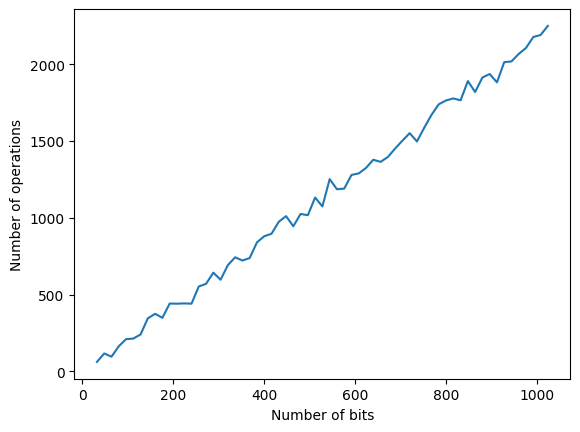

In [15]:
import matplotlib.pyplot as plt
# plot the time 

plt.plot(nbit_arr, ops)

plt.xlabel('Number of bits')
plt.ylabel('Number of operations')

In [24]:
pow(2, 400, 467)

137